In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
## defining keys

consumer_key = "peBfqUClppx3cyPqhilxqwh8F" 
consumer_secret = "GfikVkTashI0xEZxLGKIIo7TuSsMWEV5Cg7Vvmn6AMQnA2hT6G"
access_token = "1158430185516961793-Ze0zZjfJOcnd1YKTiMfCdqTrlKyhKM"
access_token_secret = "Pn0N3cn8CRysnl3dMeUgMknw2MkYPS74H8q6S4UTC4Leg"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
### collecting and cleaning 1000 tweets on covid

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#covid19 OR #covid-19 OR covid-19 OR covid19 OR #coronavirus OR coronavirus OR #vaccine OR vaccine OR pandemic OR #pandemic -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


In [4]:
len(tweets_no_urls)

1000

In [5]:
# Create textblob objects of the collected tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]

(0.25,
 TextBlob("JackSilence47 Redted797 DNCWarRoom realDonaldTrump Not fake eye witness"))

In [6]:
# Create list of polarity values and tweet texts
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[1]

[0.25,
 'JackSilence47 Redted797 DNCWarRoom realDonaldTrump Not fake eye witness']

In [7]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity_score", "tweet"])
pd.set_option('display.max_colwidth', 1000)
sentiment_df.head(10)

,polarity_score,tweet
0,0.800000,RMGB CHIKITSA SAMMAN2020RMGB is proud to confer upon the RMGB CHIKITSA SAMMAN 2020 to Honble CmhoIec CMHO Jod
1,0.250000,JackSilence47 Redted797 DNCWarRoom realDonaldTrump Not fake eye witness
2,0.000000,Chinese virologist claims she has proof COVID19 was made in Wuhan lab themoreyouknow
3,0.000000,FinancialTimes Fauci says Trump did not distort impact of the pandemic
4,0.392857,Isnt that the DAMN TRUTH Almost 500000 people are being evacuated right now and then would love a pandemic that
5,-0.100000,cnnbrk The Gates Foundation which is behind every aspect of COVID19 pandemic from financing much of WHO budget t
6,0.000000,FalwenJo Hairball911 WhiteHotVeritas KPT03A3 danwentzel SirStevenKJ joelockhart Nope
7,0.050000,222Minutes fordnation knows that his goose was cooked before the pandemic Hes only politically alive because of
8,0.000000,Since the pandemic began Ambani has added 2250000000 225 lakh cr to his wealthIn the same period India
9,0.100000,museneko clearly the coronavirus and the confinement affect your brain because what you tell is quite distorted


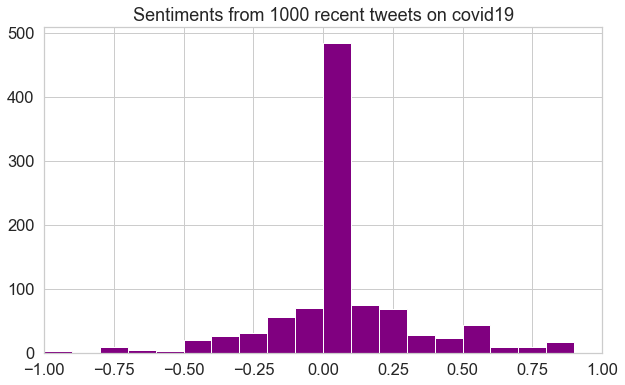

In [8]:
## Histogram of tweet sentiments

import numpy as np

bin_range = np.arange(-1, 1, 0.1)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=bin_range,
             ax=ax,
             color="purple")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid19")
plt.savefig("s_analysis.png")

plt.show()


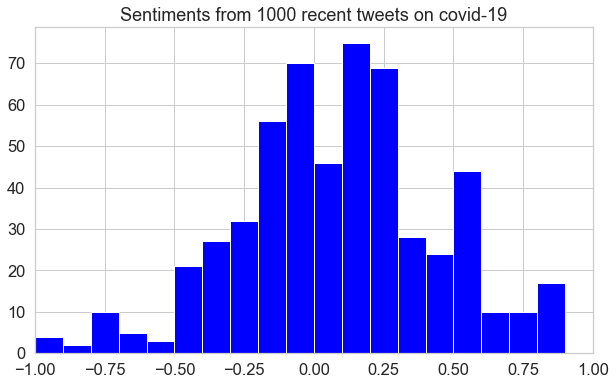

In [9]:
# Remove polarity values which equal to zero to get more valuable distribution

sentiment_df_nz = sentiment_df[sentiment_df.polarity_score != 0]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with break at zero
sentiment_df_nz.hist(bins=bin_range,
             ax=ax,
             color="blue")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid-19")
plt.show()

In [10]:
## 10 most positive tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=False)

pd.set_option('display.max_colwidth', 500)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
543,1.00,Congratulations Maharashtra your best CM OfficeofUT at work today you alone crossed one million covid 19 cases Bo
635,1.00,These came in today Thank you FullyBooked for the awesome service This is my 4th delivery amidst the pandem
147,1.00,This pandemic has been the greatest overreaction the world has ever seen Facts are being manipulated to make it
11,1.00,Are you masking distancing and doing your best even though its been months with months to go Then you are
903,1.00,StartupsEntrepreneursSMEs please follow us on linkedin Twitter as your best partner
632,1.00,Why shouldnt India legalize cannabis to recover the economy hit by COVID19 Isnt it the perfect time to raise th
536,0.91,JulieandthePhantoms remains very charming and the songs are damn catchy and if youre feeling sluggish during th
679,0.90,SFGN adamlambert PeteButtigieg PCBJohnnyMac adamlambert PeteButtigieg Pete and Adam What a brilliant insight
29,0.85,COVID19 CoronaVirus Infographic Datapack Information is Beautiful
681,0.80,Lol Who knew Spicy P stood for Spicy Pandemic


In [11]:
## 10 most negative tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=True)

pd.set_option('display.max_colwidth', 500)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
88,-1.0000,Dear OPDChiefJJ This is awful for your officer and usLooks like the continuation of another COVID19 party
810,-1.0000,sammendelson Going to a bar during a pandemic is equally pathetic
613,-1.0000,maddow I knew money had to be disappearing but this is really DISGUSTING I asked Moscow Mitch why the stingines
120,-1.0000,realDonaldTrump Pandemic fatalities at 190K worst unemployment numbers in US history Need drastic support you PoS
359,-0.9000,Some of the inmates records can be expunged And people hated newsom because they felt he was targeting them not
659,-0.8125,RobertW66197406 manvaccine JHands10 CNN Ohh man look whos still mad and insulting people claiming grow upCOME ON MANNN
800,-0.8000,This article provides some base for optimism on overcoming the coronavirus
468,-0.8000,I deleted all the dating apps again bc nothing was happening Also I hate this pandemic for a lot of reasons but I
900,-0.8000,CuomoPrimeTime CNN Giuliani sounds stupid Trump knew about the severity because he was briefed on covid19 He d
142,-0.8000,Stupid QuestionIf Covid19 is airborne Does the smoke ash Carry it Or Kill it


In [12]:
user = api.user_timeline('otvnews' , count = 10)
data = [remove_url(tweet.text) for tweet in user]
frame = pd.DataFrame(data , columns = ["tweets"])
pd.set_option('display.max_colwidth', 1000)
frame.head(10)

,tweets
0,Indias COVID19 Tally Crosses 46 Lakh Death Toll Reaches 77472
1,Athagarh A herd of 18 to 20 elephants trapped on an alluvial plain in the middle of Mahanadi River near Mundali
2,Odisha Special Trains For Migrant Workers From Today Know The Routes And Timings
3,Coronavirus Global Update Covid19 Cases Surpass 283 Million Deaths Cross 913000
4,Indias COVID19 case tally crosses 46 lakh mark with a spike of 97570 new cases in the last 24 hours With 1201
5,Rairakhol Two poachers held at Badamala range forest during a raid by forest officials 40 kg deer meat and a coun
6,Odisha conducts 50979 COVID19 tests in the last 24 hoursAntigen 43213RTPCR7607TruNat 160
7,Athagarh A herd of 18 to 20 elephants trapped on an alluvial plain in the middle of Mahanadi River near Mundali wh
8,JEE Main 2020 Results Out Sourabh Soumyakant Das Tops In Odisha
9,JEE Main 2020 results announced 24 Students Score 100 Percentile Soumyakant Das becomes Odisha topper Candidate


In [13]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [14]:
## Creating dataframe of handles and user-defined locations

users_locs_df = pd.DataFrame(data=users_locs, columns=('users', 'locations'))
users_locs_df.head(20)

,users,locations
0,Aristotle137,
1,dpc3s,787 | 1312 | 15
2,genemarks,"Philadelphia, PA"
3,jdanielaalvarez,
4,hulinganagag,online class
5,itsmfalmeamos,"Nairobi, Kenya"
6,Addictions_Pro,Hawaii
7,RamblingRingo,United Kingdom
8,lundhillbilly,
9,ManjotKalha,"Bangalore, Chandigarh- India"


In [15]:
## Replacing blanks with NaN vals

users_locs_df = users_locs_df.replace('',np.nan)
users_locs_df.head(20)
## Dropping NaN rows

users_locs_df = users_locs_df.dropna()
users_locs_df.head(20)

,users,locations
1,dpc3s,787 | 1312 | 15
2,genemarks,"Philadelphia, PA"
4,hulinganagag,online class
5,itsmfalmeamos,"Nairobi, Kenya"
6,Addictions_Pro,Hawaii
7,RamblingRingo,United Kingdom
9,ManjotKalha,"Bangalore, Chandigarh- India"
12,tEconomics,NYC
13,tEconomics,NYC
14,tEconomics,NYC


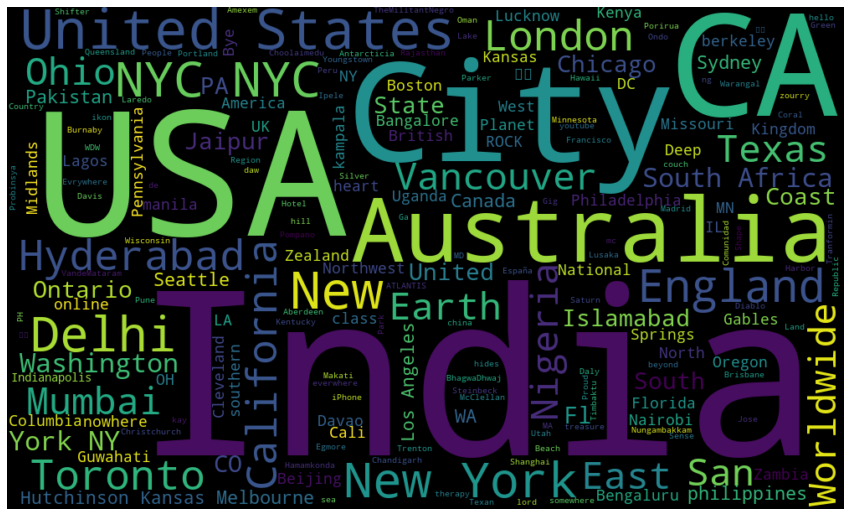

In [16]:
## turning list of locs into one big string and visualising location counts as WordCloud

all_locs_string = ' '.join(users_locs_df['locations'].tolist())

from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height=600).generate(all_locs_string)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("wordcloud.png")